# Conferencias Mañaneras

In [38]:
# Note M1 GPU support is experimental, see Thinc issue #792
# conda install -c conda-forge spacy
# conda install -c conda-forge cupy
# python -m spacy download en_core_web_sm
# python -m spacy download es_core_news_sm

In [39]:
import glob
from fastprogress import progress_bar
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

In [50]:

corpus_files = glob.glob('corpus/*.md')

corpus_texts = []

mb = progress_bar(corpus_files)

for file_path in mb:
    with open(file_path, 'r', encoding='utf-8') as file:
        corpus_texts.append(file.read())

In [52]:
spacy.prefer_gpu()

nlp = spacy.load('es_core_news_sm')

corpus_texts_sp = [None] * len(corpus_texts)

for t in progress_bar(range(len(corpus_texts))):
    text = corpus_texts[t]
    doc = nlp(text)
    corpus_texts_sp[t] = [token for token in doc if not token.is_stop]


In [53]:
# Guardar el contenido de corpus_texts_sp en un solo archivo
with open('corpus_texts_sp.txt', 'w', encoding='utf-8') as file:
    for text in corpus_texts_sp:
        file.write(' '.join([token.text for token in text]) + '\n')

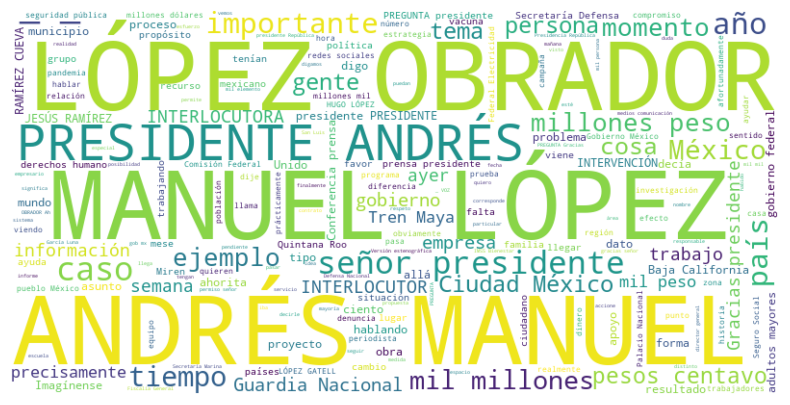

In [54]:
# Leer el contenido de corpus_texts_sp.txt
with open('corpus_texts_sp.txt', 'r', encoding='utf-8') as file:
    corpus_texts_sp_content = file.read()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus_texts_sp_content)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()